### MNIST 데이터셋 다운받기

In [1]:
from tensorflow.keras.datasets.mnist import load_data

(x_train,y_train),(x_test,y_test)=load_data(path='mnist.npz')

### 데이터 확인하기

In [2]:
#학습데이터
print(x_train.shape,y_train.shape)
print(y_train)

#테스트데이터
print(x_test.shape,y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


### 데이터 그려보기

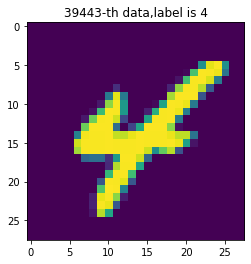

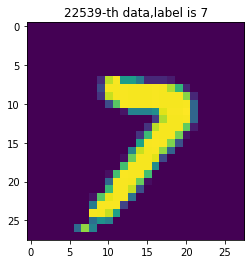

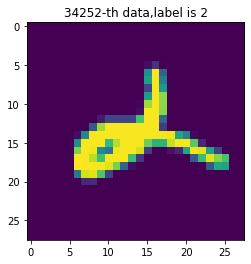

In [3]:
import matplotlib.pyplot as plt
import numpy as np

ls=np.random.randint(60000,size=3)

for i in ls:
    img=x_train[i,:]
    label=y_train[i]
    plt.figure()
    plt.imshow(img)
    plt.title('%d-th data,label is %d' %(i,label))

### 검증 데이터 만들기  
학습 데이터70%, 검증 데이터30%의 비율로 나눔

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.3,random_state=42)

print(f'훈련 데이터{x_train.shape} 레이블{y_train.shape}')
print(f'검증 데이터{x_val.shape} 레이블{y_val.shape}')

훈련 데이터(42000, 28, 28) 레이블(42000,)
검증 데이터(18000, 28, 28) 레이블(18000,)


### 모델 입력을 위한 데이터 전처리  
2차원 배열로 이루어진 숫자 이미지 데이터를 1차원 배열로 변환

In [5]:
num_x_train=x_train.shape[0]
num_x_val=x_val.shape[0]
num_x_test=x_test.shape[0]

x_train=(x_train.reshape((num_x_train,28*28)))/255
x_val=(x_val.reshape((num_x_val,28*28)))/255
x_test=(x_test.reshape((num_x_test,28*28)))/255

print(x_train.shape)

(42000, 784)


### 모델 입력을 위한 레이블 전처리

In [6]:
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 모델 구성하기

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

model.add(Dense(64,activation='relu',input_shape=(784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

### 소프트맥스와 시그모이드 값 비교

In [8]:
def softmax(arr):
    m=np.max(arr)
    arr=arr-m
    arr=np.exp(arr)
    return arr/np.sum(arr)

def sigmoid(x):
    return 1/(1+np.exp(-x))

case_1=np.array([3.1,3.0,2.9])
case_2=np.array([2.0,1.0,0.7])

#소수점 제한
np.set_printoptions(precision=3)

print(f'sigmoid{sigmoid(case_1)},softmax{softmax(case_1)}')
print(f'sigmoid{sigmoid(case_2)},softmax{softmax(case_2)}')

sigmoid[0.957 0.953 0.948],softmax[0.367 0.332 0.301]
sigmoid[0.881 0.731 0.668],softmax[0.61  0.224 0.166]


### 학습과정 설정하기

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

### 모델 학습하기

In [10]:
history=model.fit(x_train,y_train,
                  epochs=5,
                  batch_size=128,
                  validation_data=(x_val,y_val))

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 1s 28us/sample - loss: 0.4979 - acc: 0.8613 - val_loss: 0.2620 - val_acc: 0.9239
Epoch 2/5
42000/42000 [==============================] - 1s 15us/sample - loss: 0.2160 - acc: 0.9387 - val_loss: 0.1976 - val_acc: 0.9461
Epoch 3/5
42000/42000 [==============================] - 1s 16us/sample - loss: 0.1654 - acc: 0.9529 - val_loss: 0.1604 - val_acc: 0.9557
Epoch 4/5
42000/42000 [==============================] - 1s 14us/sample - loss: 0.1338 - acc: 0.9616 - val_loss: 0.1607 - val_acc: 0.9519
Epoch 5/5
42000/42000 [==============================] - 1s 14us/sample - loss: 0.1139 - acc: 0.9671 - val_loss: 0.1320 - val_acc: 0.9609


### history를 통해 확인해볼 수 있는 값 출력

In [11]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### 학습결과 그려보기

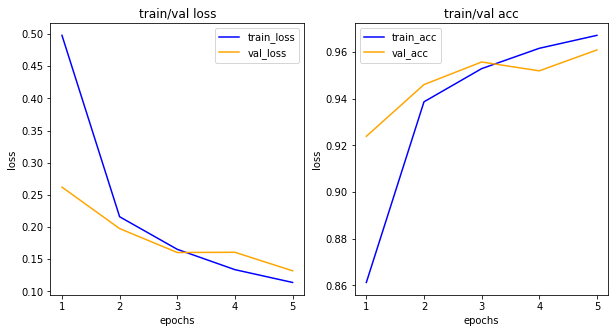

In [12]:
his_dict=history.history

loss=his_dict['loss']
val_loss=his_dict['val_loss']

epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))

#학습 및 검증 손실 그리기
ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='orange',label='val_loss')
ax1.set_title('train/val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc=his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='blue',label='train_acc')
ax2.plot(epochs,val_acc,color='orange',label='val_acc')
ax2.set_title('train/val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

In [13]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.12768320906441658, 0.9602]

In [14]:
results=model.predict(x_test)
print(results.shape)

#소수점 제한
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률: \n{results [0]}')

(10000, 10)
각 클래스에 속할 확률: 
[4.5307006e-05 1.7133566e-06 1.0963449e-03 2.2423719e-03 1.6871320e-07
 1.5976402e-05 1.9515736e-09 9.9621969e-01 3.1084866e-05 3.4736845e-04]


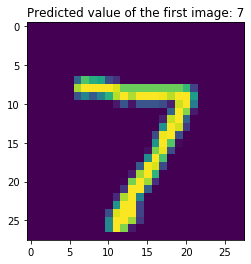

In [15]:
#확률이 가장 큰 값의 인덱스를 가져옴
arg_results=np.argmax(results,axis=-1)
plt.imshow(x_test[0].reshape(28,28))
plt.title('Predicted value of the first image: '+str(arg_results[0]))
plt.show()

### 혼동행렬을 이용한 모델 평가

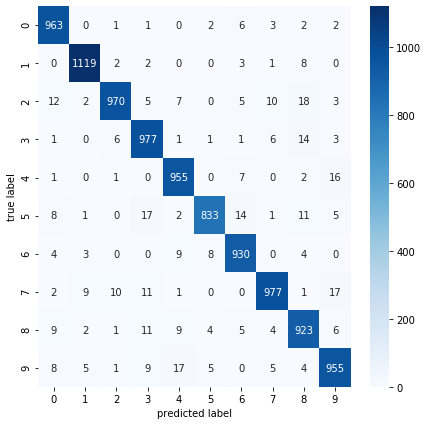

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

plt.figure(figsize=(7,7))
cm=confusion_matrix(np.argmax(y_test,axis=-1),np.argmax(results,axis=-1))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()